# Backtesting SMA trading strategy using Vectorbt API

### Source code: 
https://pypi.org/project/vectorbt/ , https://vectorbt.dev/docs/index.html

In [8]:
# Import libraries
import vectorbt as vbt
import numpy as np
import pandas as pd
import plotly.io as pio

pio.renderers.default = 'svg' # comment this line out to get interactive charts

In [9]:
# Pull hostorical prices
price = vbt.YFData.download('ETH-USD', freq='D', fees=0.01, missing_index='drop').get('Close')
# Select time window to test.

price = price.loc["2015":"2022"]
price

Date
2017-11-09 00:00:00+00:00     320.884003
2017-11-10 00:00:00+00:00     299.252991
2017-11-11 00:00:00+00:00     314.681000
2017-11-12 00:00:00+00:00     307.907990
2017-11-13 00:00:00+00:00     316.716003
                                ...     
2022-01-06 00:00:00+00:00    3418.408203
2022-01-07 00:00:00+00:00    3193.210449
2022-01-08 00:00:00+00:00    3091.972656
2022-01-09 00:00:00+00:00    3157.751465
2022-01-10 00:00:00+00:00    3151.740723
Freq: D, Name: Close, Length: 1524, dtype: float64

In [10]:
# Define short and long SMA windows. Test different window combinations to see results of Buy & Hold vs SMA strategy
fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 20)
entries = fast_ma.ma_above(slow_ma, crossover=True)
exits = fast_ma.ma_below(slow_ma, crossover=True)

# Fit the model and input starting investment to calculate total profit form the trading stategy
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf.total_profit()

2867.4232589616804

In [11]:
# Calculate total profit from the Buy & Hold strategy
pf1 = vbt.Portfolio.from_holding(price, init_cash=100)
pf1.total_profit()

882.2056245492631

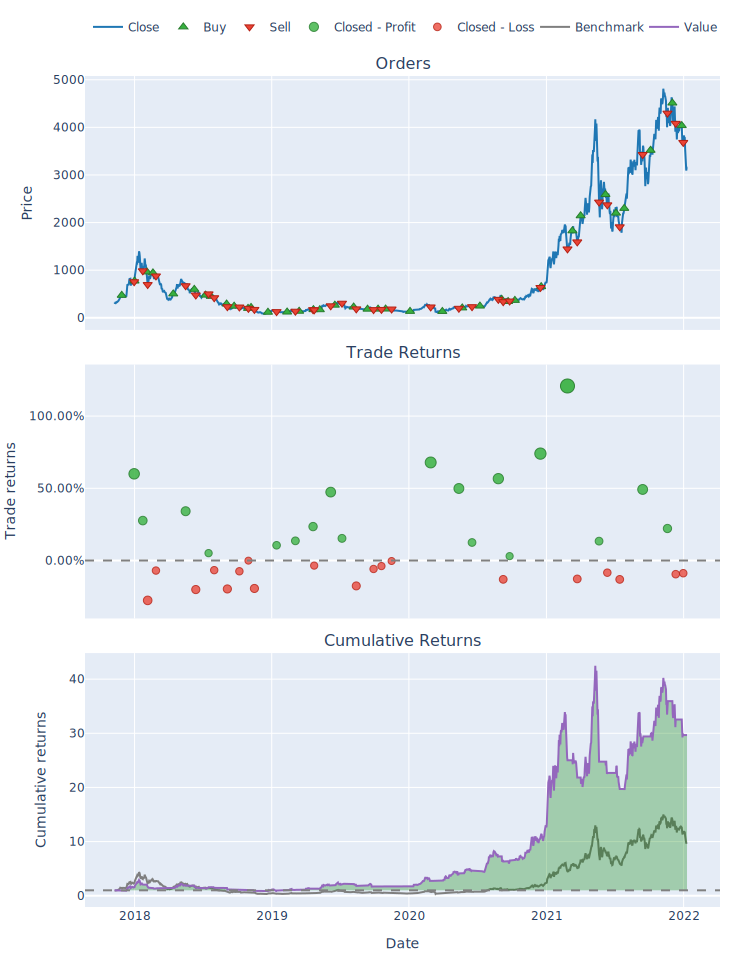

In [12]:
# Plot trading strategy
pf.plot().show()

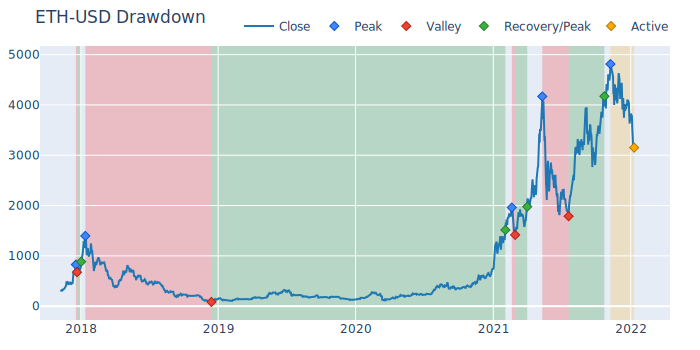

In [13]:
# Plot drawdown for the selected strategy
price.vbt.drawdowns.plot(title='ETH-USD Drawdown').show()

In [14]:
# Obtain complete stats for the trading strategy
pf.stats(freq='D')

Start                     2017-11-09 00:00:00+00:00
End                       2022-01-10 00:00:00+00:00
Duration                         1524 days 00:00:00
Initial Cash                                  100.0
Total Profit                            2867.423259
Total Return [%]                        2867.423259
Benchmark Return [%]                     882.205625
Position Coverage [%]                     54.396325
Max Drawdown [%]                          70.083985
Avg Drawdown [%]                          11.245858
Max Drawdown Duration             760 days 00:00:00
Avg Drawdown Duration              36 days 10:12:00
Trade Count                                      38
Win Rate [%]                                   50.0
Best Trade [%]                           120.831903
Worst Trade [%]                          -27.599871
Avg Trade [%]                             13.218145
Max Trade Duration                 70 days 00:00:00
Avg Trade Duration       21 days 19:34:44.210526315
Expectancy  